In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math
%matplotlib inline

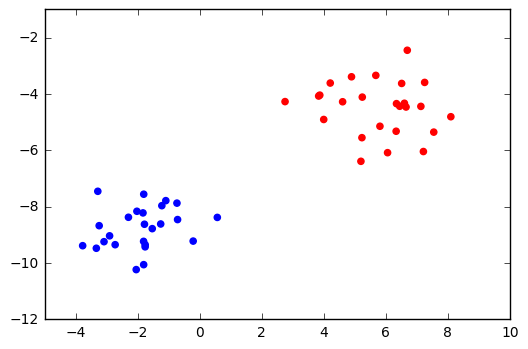

In [2]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]
colors = {1:'r',0:'b'}
plt.scatter(X1[:,1],X1[:,2],marker='o',color = [colors[i] for i in y] )
plt.axis([-5,10,-12,-1])
plt.show()

In [3]:
from collections import defaultdict

## We have two features(Independent variables) and 1 dependent variable which is either 0 or 1, for SVM convenience we treat them either -1 or 1 separate our data-set like that and define required variables.

In [4]:
data_dict = defaultdict(list)
for i in range(len(y)):
    if y[i] == 0:
        data_dict[-1].append(X[i])
    else:
        data_dict[1].append(X[i])

In [5]:
#all the required variables 
w = []
b = []
max_feature_value = np.amax(data_dict[1])
min_feature_value = np.amin(data_dict[-1])

learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

## update the hyperplane paramters yi*(WX+b) >=1
1. (w*xi + b) >= 1 if yi = 1
2. (w*xi + b) <= -1 if yi = -1

In [6]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2 
                            

In [7]:
SVM_Training(data_dict)

In [8]:
w

array([0.32376327, 0.32376327])

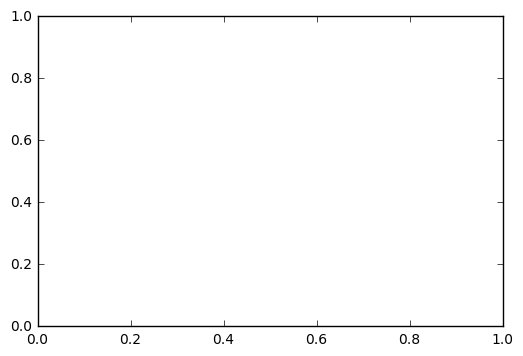

In [9]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [10]:
def visualize(data_dict):
       
        
        #[[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
        
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.axis([-5,10,-12,-1])
        plt.show()

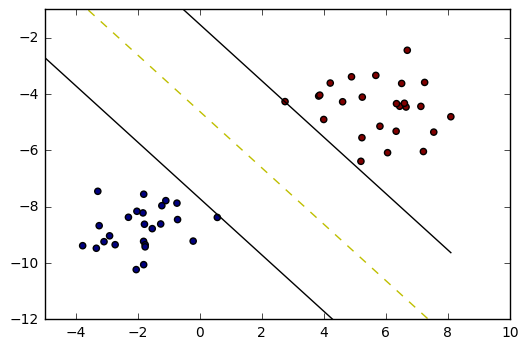

In [11]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
visualize(data_dict)

In [12]:
def predict(features):
        # sign( x.w+b )
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

1,  1,  -1,  1,  -1,  